y0:  (999, 1, 0, 0)


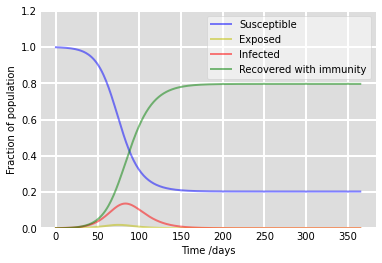

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of exposed, infected, recovered individuals, E0, I0 and R0.
E0 = 1
I0 = 0
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.2
gamma = 1./10
# risk of infection of average strategie, sigma. Use a constant value for now and replace with function later
sigma = 1 # 1 is the maximum risk of infection
# rate at which exposed population becomes infected, alpha
alpha = 0.8

# A grid of time points (in days)
t_max = 365 # maximum number of days, e.g. until vaccination 
t = np.linspace(0, t_max, t_max)

# The SIR model differential equations.
def deriv(y, t, N, sigma, beta, alpha, gamma):
    S, E, I, R = y
    dSdt = -sigma * beta * S * I / N
    dEdt = sigma * beta * S * I / N - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0
print('y0: ',y0)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, sigma, beta, alpha, gamma))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

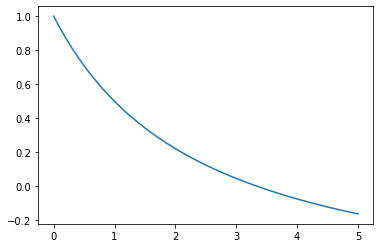

In [20]:
# Function for the risk of infection should have the value 1 at c=0, and the limit should be 0 as c goes to infinity
import matplotlib.pyplot as plt
import numpy as np

def f(c):
    return 2-(1+1/(c+1))**c #** is a ^

c = np.linspace(0,5,3001)

plt.plot(c, f(c))
plt.show()